# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="attachment:ai_eval_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 90 баллов

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

#### Тренировочные задачи на библиотеки

Если вы неуверенно себя чувствуете в библиотеках numpy, pandas, matplotlib, seaborn, рекомендуем сначала
* посмотреть материалы по библиотекам на нашем сайте
* прорешать упражнения на библиотеки на странице курса
* прорешать <a href="https://contest.yandex.ru/contest/75090/enter/">два упражнения на numpy</a> в системе Яндекс.Контест.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9ede240862d9bf1602556040405c317e -->
---
### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.

Подгружаем библиотеки

In [44]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [45]:
random_state = 42

digits = datasets.load_digits()
n_samples = len(digits["images"])
X, y = digits["images"].reshape(n_samples, -1), digits["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state
)

Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

In [47]:
train_accuracy = []
test_accuracy = []

k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

строим график

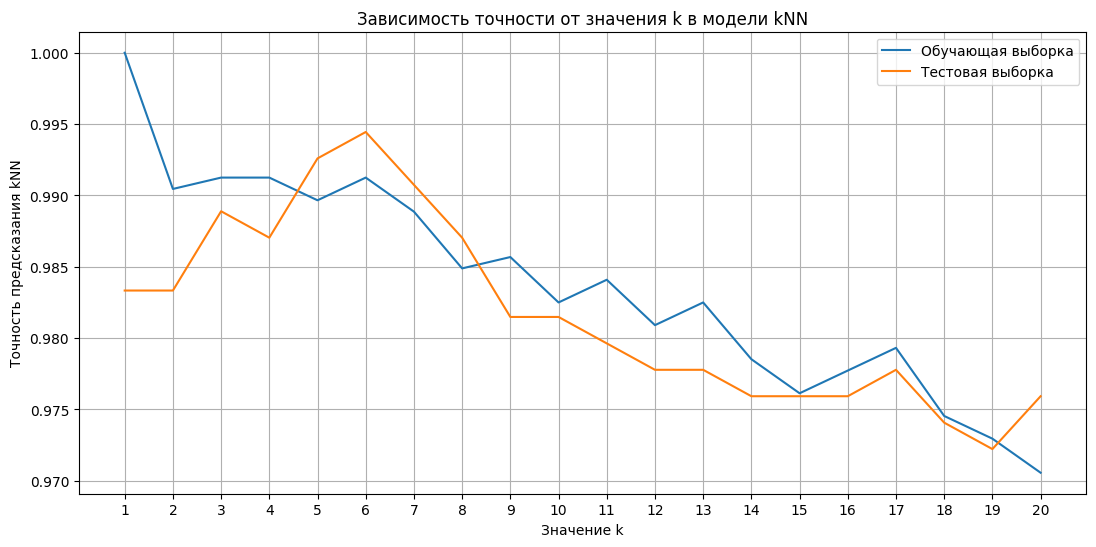

In [48]:
plt.figure(figsize=(13, 6))
plt.plot(k_values, train_accuracy, label='Обучающая выборка')
plt.plot(k_values, test_accuracy, label='Тестовая выборка')
plt.xlabel('Значение k')
plt.ylabel('Точность предсказания kNN')
plt.title('Зависимость точности от значения k в модели kNN')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- fe9171a6e245a953987df27f018c61c2 -->
&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:** Predict на тренировочной выборке работает таким образом, что для каждого элемента из тренировочной выборки выбираются k ближайших соседей(в нашем случае 1 -> ближайший сосед - это сам элемент), и результат выбирается как чаще всего встречаемый класс.

Очев, что это будет класс самого элемента, поэтому точность - 100%.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- cdb15caec1719ca7ba80d25b716879ca -->
Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

In [51]:
train_accuracy = []
test_accuracy = []

k_values = range(1, 21)

for k in k_values:
    # евклидово
    model = KNeighborsClassifier(n_neighbors=k, algorithm="brute", p=2)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

In [52]:
train_accuracy_manhatan = []
test_accuracy_manhatan = []

k_values = range(1, 21)

for k in k_values:
    # манхэттен
    model_manhatan = KNeighborsClassifier(n_neighbors=k, algorithm="brute", p=1)
    model_manhatan.fit(X_train, y_train)

    y_train_pred_manhatan = model_manhatan.predict(X_train)
    y_test_pred_manhatan = model_manhatan.predict(X_test)

    train_accuracy_manhatan.append(accuracy_score(y_train, y_train_pred_manhatan))
    test_accuracy_manhatan.append(accuracy_score(y_test, y_test_pred_manhatan))

строим график

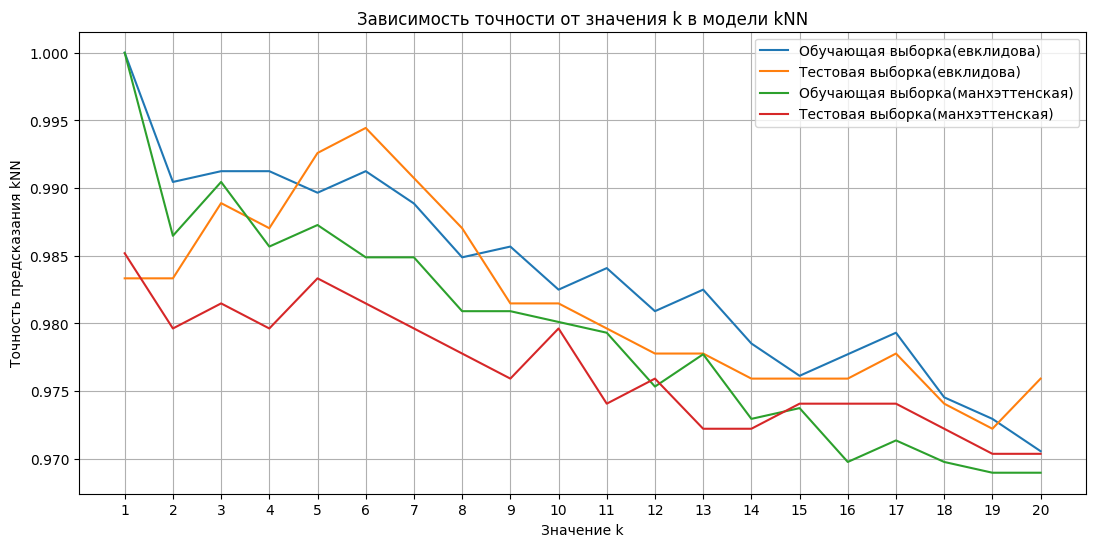

In [53]:
plt.figure(figsize=(13, 6))
plt.plot(k_values, train_accuracy, label='Обучающая выборка(евклидова)')
plt.plot(k_values, test_accuracy, label='Тестовая выборка(евклидова)')
plt.plot(k_values, train_accuracy_manhatan, label='Обучающая выборка(манхэттенская)')
plt.plot(k_values, test_accuracy_manhatan, label='Тестовая выборка(манхэттенская)')
plt.xlabel('Значение k')
plt.ylabel('Точность предсказания kNN')
plt.title('Зависимость точности от значения k в модели kNN')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:** Как и было расписано до этого, в kNN метрика роляет: "метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние", "в задачах с разреженными данными метрика Манхэттена может работать лучше, чем евклидово расстояние".

Ну и очев результаты мы видим на графике.

Тем не менее, при k = 1 на обучающей выборке точность и там, и там 100%(что тоже очев из предыдущего подпункта этой задачи)

**Выводы:** Из задачи 1 можем сделать вывод, что kNN зависит от своих параметров(число соседей, алгоритма расчёта расстояния, метрики) - это и ожидалось.

Число соседей - наглядно показал график зависимости точности от числа соседей.

Метрика - тот же график, но с разными метриками соответственно.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->


---

### Задача 2

Перед выполнением задачи рекомендуется посмотреть <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">материал</a> с семинара.

#### 0. Подготовка данных

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [54]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [55]:
features_columns = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак

X, y = titanic[features_columns], titanic[target_column]

В данных могут присутствовать пропуски. Пока что мы не умеем с ними работать, так что исключим из данных.

Посмотрите, сколько объектов имеют хотя бы один пропуск. Удалите их из данных.

In [56]:
titanic.isnull().any(axis=1).sum()

708

In [57]:
titanic = titanic.dropna(how = 'any')

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [58]:
X, y = titanic[features_columns], titanic[target_column]

titanic_train, titanic_test = train_test_split(
    titanic, train_size=0.7, random_state=random_state
)

X_train, X_test, y_train, y_test = titanic_train[features_columns], titanic_test[features_columns], titanic_train[target_column], titanic_test[target_column]

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 371b31e8ca86989a98cce342afcbbf2a -->
#### 1. Исследование

> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков, посмотрите презентацию про оформление домашних заданий.*

Зависимость числа выживших от возраста:

Подсчитываем данные

In [61]:
mid = titanic_train[titanic_train['Age'] > 25]
young = titanic_train[titanic_train['Age'] <= 25]

live_y = young[young['Survived'] == 1].shape[0]
dead_y = young[young['Survived'] == 0].shape[0]
live_m = mid[mid['Survived'] == 1].shape[0]
dead_m = mid[mid['Survived'] == 0].shape[0]

survived_count = [live_y, live_m]
dead_count = [dead_y, dead_m]
ages = ['age <= 25', 'age > 25']

Строим график

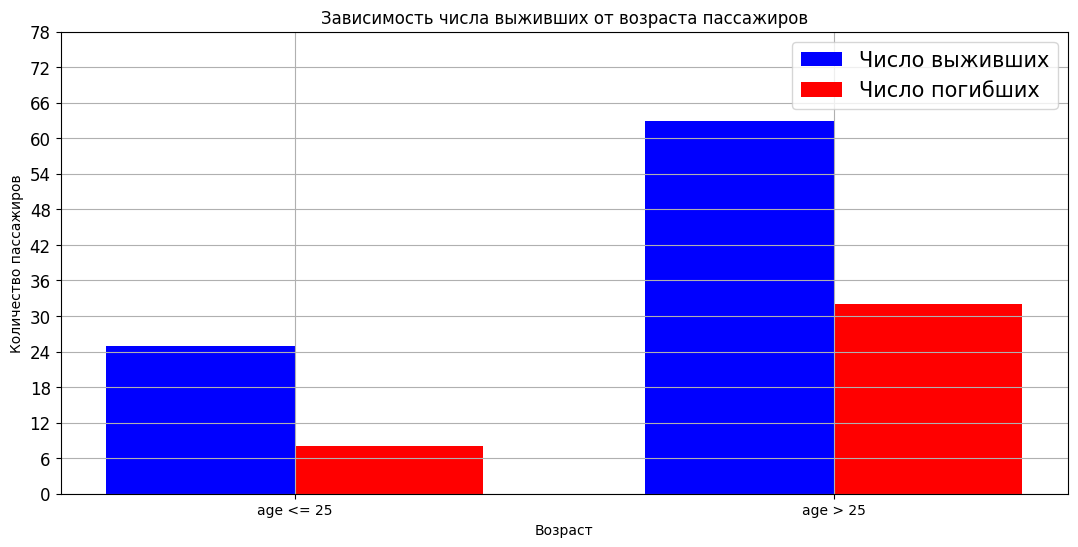

In [62]:
x = np.arange(len(ages))
width = 0.35

plt.figure(figsize=(13, 6))
bars_live = plt.bar(x - width / 2, survived_count, width, color = 'blue', label='Число выживших')
bars_dead = plt.bar(x + width / 2, dead_count, width, color = 'red', label='Число погибших')

plt.xticks(x, ages)
plt.yticks(range(0, 80, 6), fontsize=12)

plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Зависимость числа выживших от возраста пассажиров')

plt.legend(fontsize=15)
plt.grid(True)

plt.show()

Зависимость числа выживших от пассажирского класса:

In [63]:
class_1 = titanic_train[titanic_train['Pclass'] == 1]
class_2 = titanic_train[titanic_train['Pclass'] == 2]
class_3 = titanic_train[titanic_train['Pclass'] == 3]

live_1 = class_1[class_1['Survived'] == 1].shape[0]
dead_1 = class_1[class_1['Survived'] == 0].shape[0]
live_2 = class_2[class_2['Survived'] == 1].shape[0]
dead_2 = class_2[class_2['Survived'] == 0].shape[0]
live_3 = class_3[class_3['Survived'] == 1].shape[0]
dead_3 = class_3[class_3['Survived'] == 0].shape[0]

survived_count = [live_1, live_2, live_3]
dead_count = [dead_1, dead_2, dead_3]
pclasses = ['class 1', 'class 2', 'class 3']

Строим график

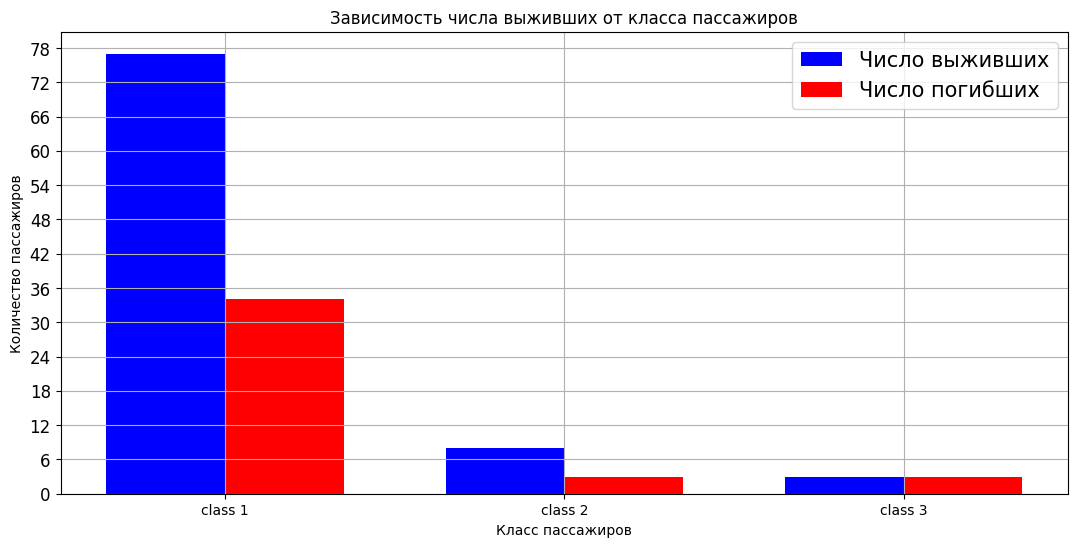

In [64]:
x = np.arange(len(pclasses))
width = 0.35

plt.figure(figsize=(13, 6))
bars_live = plt.bar(x - width / 2, survived_count, width, color = 'blue', label='Число выживших')
bars_dead = plt.bar(x + width / 2, dead_count, width, color = 'red', label='Число погибших')

plt.xticks(x, pclasses)
plt.yticks(range(0, 80, 6), fontsize=12)

plt.xlabel('Класс пассажиров')
plt.ylabel('Количество пассажиров')
plt.title('Зависимость числа выживших от класса пассажиров')

plt.legend(fontsize=15)
plt.grid(True)

plt.show()

Зависимость числа выживших от пола:

In [65]:
man = titanic_train[titanic_train['Sex'] == 'male']
woman = titanic_train[titanic_train['Sex'] == 'female']

live_m = man[man['Survived'] == 1].shape[0]
dead_m = man[man['Survived'] == 0].shape[0]
live_w = woman[woman['Survived'] == 1].shape[0]
dead_w = woman[woman['Survived'] == 0].shape[0]

survived_count = [live_m, live_w]
dead_count = [dead_m, dead_w]
sex = ['man', 'woman']

Строим график

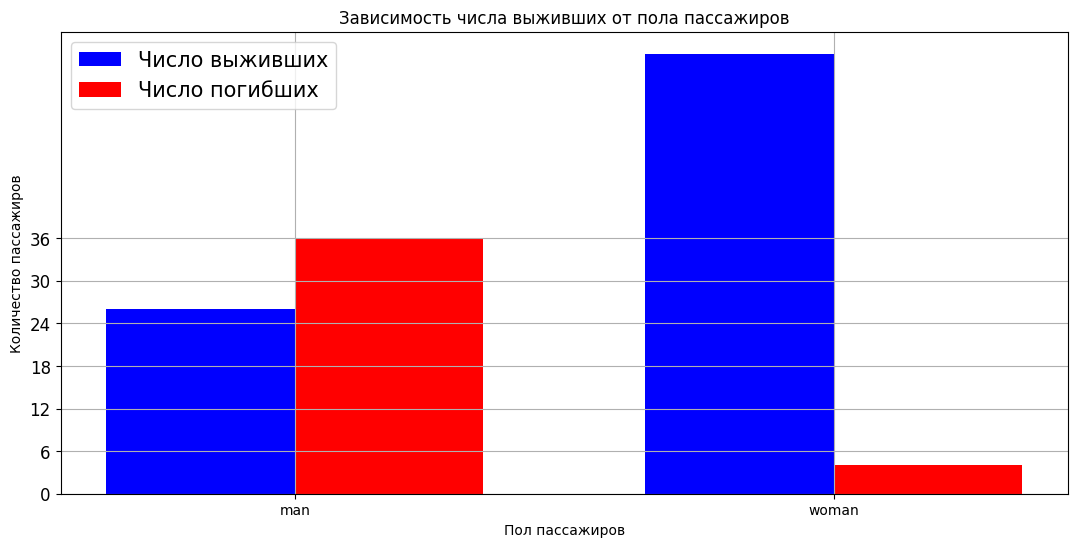

In [67]:
x = np.arange(len(sex))
width = 0.35

plt.figure(figsize=(13, 6))
bars_live = plt.bar(x - width / 2, survived_count, width, color = 'blue', label='Число выживших')
bars_dead = plt.bar(x + width / 2, dead_count, width, color = 'red', label='Число погибших')

plt.xticks(x, sex)
plt.yticks(range(0, 40, 6), fontsize=12)

plt.xlabel('Пол пассажиров')
plt.ylabel('Количество пассажиров')
plt.title('Зависимость числа выживших от пола пассажиров')

plt.legend(fontsize=15)
plt.grid(True)

plt.show()

Зависимость числа выживших от числа родственников на борту:

In [68]:
sib = titanic_train[titanic_train['SibSp'] > 0]
no_sib = titanic_train[titanic_train['SibSp'] == 0]

live_has = sib[sib['Survived'] == 1].shape[0]
dead_has = sib[sib['Survived'] == 0].shape[0]
live_no = no_sib[no_sib['Survived'] == 1].shape[0]
dead_no = no_sib[no_sib['Survived'] == 0].shape[0]

survived_count = [live_has, live_no]
dead_count = [dead_has, dead_no]
siblings = ['has siblings', 'no siblings']

Строим график

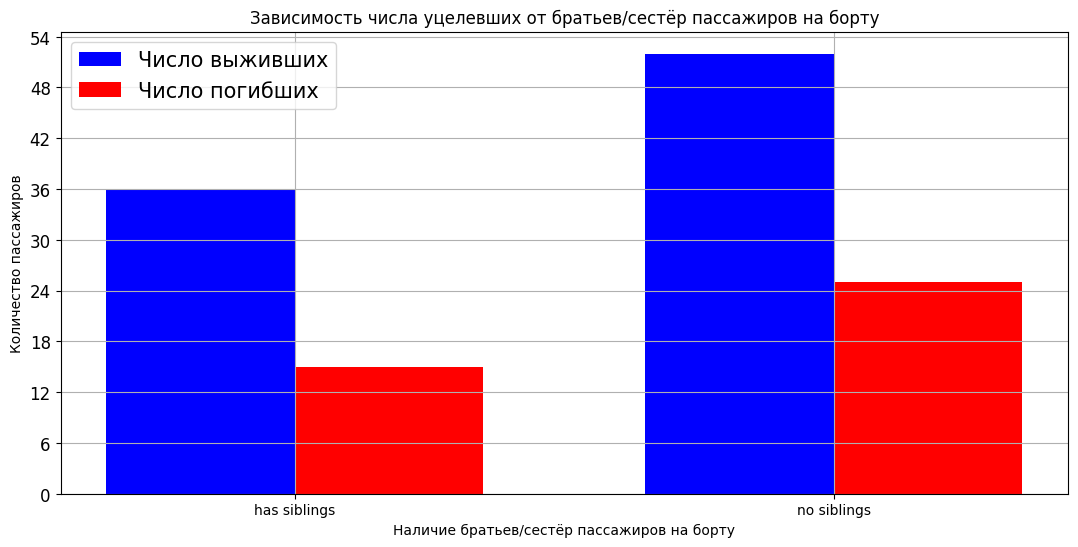

In [69]:
x = np.arange(len(siblings))
width = 0.35

plt.figure(figsize=(13, 6))
bars_live = plt.bar(x - width / 2, survived_count, width, color = 'blue', label='Число выживших')
bars_dead = plt.bar(x + width / 2, dead_count, width, color = 'red', label='Число погибших')

plt.xticks(x, siblings)
plt.yticks(range(0, 60, 6), fontsize=12)

plt.xlabel('Наличие братьев/сестёр пассажиров на борту')
plt.ylabel('Количество пассажиров')
plt.title('Зависимость числа уцелевших от братьев/сестёр пассажиров на борту')

plt.legend(fontsize=15)
plt.grid(True)

plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 476dce11b8cac8705a10bff695e4cdee -->
#### 2. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики. Любые решения "из коробки" использовать запрещено. Например, достаточно пояснения "*по графику (описание графика) визуально я увидел, что при X > 100 большинство пассажиров выжило, поэтому использую правило (описание правила)*".

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. Дерево из одного листа имеет глубину 0.

*Указание*. Попросите ИИ красиво оформить описание дерева и его пояснение.

**Дерево 1:**

 Правило:

    Если пассажир — женщина (Sex == 'female'):

        Если она находится в 1-м или 2-м классе (Pclass == 1 или Pclass == 2):

            Выжила (Survived = 1).

        Иначе (Pclass == 3):

            Погибла (Survived = 0).

    Иначе (пассажир — мужчина):

        Погиб (Survived = 0).

Пояснение:

    Из анализа данных видно, что женщины в 1-м и 2-м классах чаще выживали, чем женщины в 3-м классе.

    Мужчины, независимо от класса, чаще погибали.

**Дерево 2:**

Правило:

    Если пассажир юн(не старше 25) (Age <= 25):

        Выжил (Survived = 1).

    Иначе (Age > 25):

        Погиб (Survived = 0).

Пояснение:

    Юные чаще выживали(из графика зависимости числа выживших от возраста пассажиров видно, что хоть суммарно людей постарше выжило побольше, но процент выживаемости у юных - ощутимо больше: 2 < 3.8).

Реализуйте полученные деревья по шаблону

Дерево №1

In [70]:
def tree1(features: pd.DataFrame) -> pd.Series:
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    """

    predicted = pd.Series(0, index=features.index)  # По умолчанию все погибли
    # Женщины в 1-м или 2-м классе выжили
    predicted[(features['Sex'] == 'female') & (features['Pclass'].isin([1, 2]))] = 1
    return predicted

Дерево №2

In [71]:
def tree2(features: pd.DataFrame) -> pd.Series:
    predicted = pd.Series(0, index=features.index)  # По умолчанию все погибли
    # Юные выжили
    predicted[features['Age'] <= 25] = 1
    return predicted

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 509cca15393d5b0fb3cf40b463d12077 -->
Проверьте работоспособность данных моделей на тестовой выборке и оцените качество модели по метрике `accuracy`.

> &#x2755; *Примечание.* Полученные значения не влияют на оценку по заданию. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [72]:
def accuracy(target: pd.Series, predicted: pd.Series) -> float:
    """
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    """

    return (target == predicted).mean()

In [73]:
predicted_tree1 = tree1(titanic_test)
predicted_tree2 = tree2(titanic_test)

accuracy_tree1 = accuracy(titanic_test['Survived'], predicted_tree1)
accuracy_tree2 = accuracy(titanic_test['Survived'], predicted_tree2)
accuracy_tree1, accuracy_tree2

(0.7090909090909091, 0.6)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2bf781f25f8969f7e712ea5d28d608a3 -->
#### 3. Классификация методом ближайшего соседа

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


&#x2753; **Вопрос** &#x2753;
> Какие могли бы возникнуть проблемы при использовании признаков `'SibSp'`, `'Parch'`? Имеется ли подобная проблема для признака `'Pclass'`?

**Ваш ответ:** Признаки 'SibSp' и 'Parch' наименее информативные среди всех остальных, т.к по факту наличие семьи вообще никаким образом не влияет на выживаемость. + непонятно, в чём различие между одним и тремя братьями - ещё одна неоднозначность параметра.

Pclass, в свою очередь, ощутимо влияет на процент выживаемости - что очень сильно заметно из графика зависимости выживаемости от класса пассажира.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3bfbe10cf933e1302c2f524a99acfa54 -->
Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




In [74]:
features = titanic_train[['Pclass', 'Age', 'Sex', 'Fare']]
target = titanic_train['Survived']

features.loc[:, 'Sex'] = features['Sex'].map({'male': 1, 'female': 2})
features_train, features_test, target_train, target_test = train_test_split(
    features, target, train_size = 0.7, random_state = random_state
)

model = KNeighborsClassifier(n_neighbors = 4)
model.fit(features_train, target_train)
target_predicted = model.predict(features_test)

accuracy = accuracy_score(target_test, target_predicted)
accuracy

0.6923076923076923

Получил, что точность kNN на уровне лучшего из двух моих решающих деревьев. Что мне кажется логичным, т.к решающее дерево имеет "приблизительный" подход к задаче, в то же время kNN точно серьёзнее в математическом плане.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 21227e76b996f62c6c83ee38ce486bdf -->
Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

In [75]:
for column in features.columns:
    print(f"Признак: {column}")
    print(f"Минимальное значение: {features[column].min()}")
    print(f"Максимальное значение: {features[column].max()}")
    print("\n")

Признак: Pclass
Минимальное значение: 1
Максимальное значение: 3


Признак: Age
Минимальное значение: 2.0
Максимальное значение: 80.0


Признак: Sex
Минимальное значение: 1
Максимальное значение: 2


Признак: Fare
Минимальное значение: 0.0
Максимальное значение: 512.3292




Как мы видим данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:**  Итак, разница в масштабах значений в разных столбцах роляет и очень сильно. В базе kNN-на заложен поиск расстояния, и из-за большого разброса в значениях(Age - (0, 80), Price - (0, 512)) разные признаки будут оказывать разное влияение на результат. То есть разница в цене в 10 окажет большее влияние, чем разница в возрасте в 10(хотя по факту возраст роляет точно больше).


Для решения этой проблемы нужно привести признаки к единому масштабу. Существует много методов масштабирования рассмотрим работу одного из них &mdash; **минимаксная нормализация**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следующей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Стоит отметить что существуют и другие методы масштабирования данных.

&#x2753; **Вопрос** &#x2753;
> В чем может быть недостаток такого метода масштабирования?

**Ваш ответ:** Если в нашей тестовой выборке одновременно есть и макс и мин выбросы, то масштабирование пойдёт не совсем по плану(прям очень).

Также при таком методе масштабирования мы точно теряем характер распределения нашего признака, что тоже не есть хорошо.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3cf8b0b6b0402c9ceb439c2de6ee4276 -->


Отмасштабируйте данные

In [76]:
from sklearn.preprocessing import MinMaxScaler
features_scale = MinMaxScaler().fit_transform(features)

Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

In [77]:
features_scale = pd.DataFrame(features_scale, columns = features.columns)
for column in features_scale.columns:
    print(f"Признак: {column}")
    print(f"Минимальное значение: {features_scale[column].min()}")
    print(f"Максимальное значение: {features_scale[column].max()}")
    print("\n")

Признак: Pclass
Минимальное значение: 0.0
Максимальное значение: 1.0


Признак: Age
Минимальное значение: 0.0
Максимальное значение: 0.9999999999999999


Признак: Sex
Минимальное значение: 0.0
Максимальное значение: 1.0


Признак: Fare
Минимальное значение: 0.0
Максимальное значение: 1.0




Обучите модель и сравните результат предсказаний со стандартизацией и без.

In [78]:
features_scale_train, features_scale_test, target_train, target_test = train_test_split(
    features_scale, target, train_size = 0.7, random_state = random_state
)

model = KNeighborsClassifier(n_neighbors = 4)
model.fit(features_scale_train, target_train)
target_predicted = model.predict(features_scale_test)

accuracy = accuracy_score(target_test, target_predicted)
accuracy

0.7692307692307693

**Вывод:** Масштабирование(даже минимаксное) дало свои плоды и мы видим это наглядно - новая точность kNN-на побила и решающие деревья и прошлый kNN. Да, ненамного, но по факту прирост в 0.06 на практике(скорее всего) считается неплохим.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 02a5bc7d6f2e8382a04db099c58ba6d1 -->
**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

In [79]:
train_accuracy = []
test_accuracy = []

k_values = range(1, 21)

for k in k_values:
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(features_scale_train, target_train)

  target_test_predicted = model.predict(features_scale_test)
  target_train_predicted = model.predict(features_scale_train)

  train_accuracy.append(accuracy_score(target_train_predicted, target_train))
  test_accuracy.append(accuracy_score(target_test_predicted, target_test))

Строим график

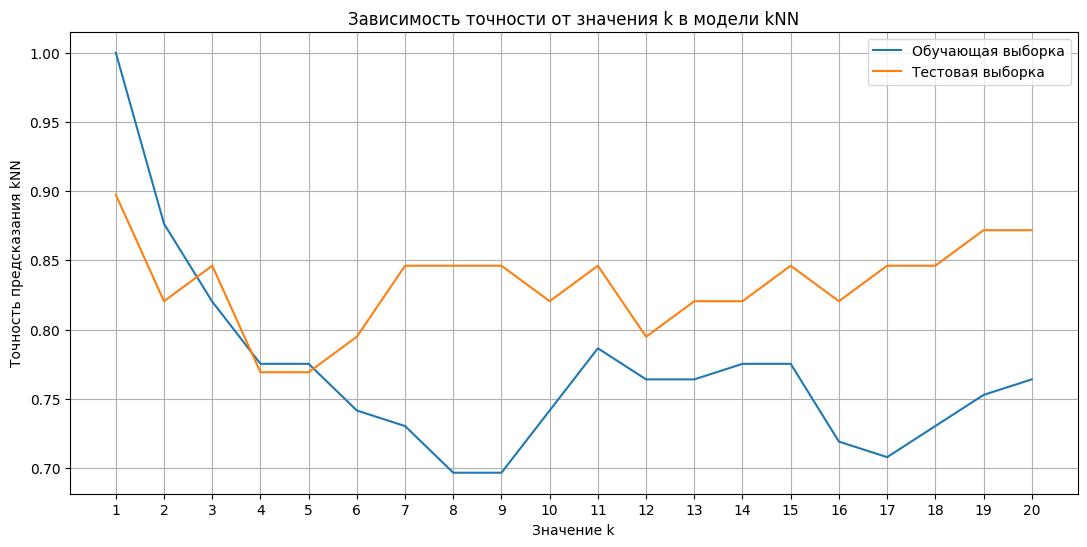

In [80]:
plt.figure(figsize=(13, 6))
plt.plot(k_values, train_accuracy, label='Обучающая выборка')
plt.plot(k_values, test_accuracy, label='Тестовая выборка')
plt.xlabel('Значение k')
plt.ylabel('Точность предсказания kNN')
plt.title('Зависимость точности от значения k в модели kNN')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

**Вывод:** Посмотрели, как работает kNN на реальных задачах. Глядя на точности при разных подходах к решению поставленной задачи, явно видно, что kNN один из лучших. Используя минмаксное масштабирование(которое подходит в данной задаче, т.к сильных выбросов не наблюдается), получили лучшее из значений точности(0.7692307692307693) - что и ожидалось.

